https://infocenter.nordicsemi.com/pdf/nRF52833_PS_v1.3.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(len(times))

sin = np.sin(times)

print(sin)

10
[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111]


In [3]:
voltage = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.3])
battery = [[84, 84, 84, 126, 126], [492, 492, 492, 492, 492], [984, 984, 984, 984, 984], [1490, 1490, 1490, 1490, 1490], [1982, 1996, 1982, 1982, 1996], [2489, 2489, 2489, 2489, 2489], [2981, 2995, 2981, 2885, 2981], [3248, 3262, 3262, 3262, 3262]]
battery_pct = [[2, 2, 2, 3, 2], [13, 13, 13, 13, 13], [27, 27, 27, 27, 27], [41, 41, 41, 41, 41], [55, 55, 55, 55, 55], [69, 69, 69, 69, 69], [82, 83, 82, 83, 82], [90, 90, 90, 90, 90]]

Vpp_100_in = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
Vpp_100_calculated = [[5, 4, 5, 4, 4],
                      [17, 15, 19, 18, 18],
                      [22, 21, 23, 22, 23],
                      [26, 26, 26, 27, 26],
                      [28, 26, 26, 29, 26],
                      [30, 31, 29, 30, 29], 
                      [33, 33, 34, 34, 33], 
                      [41, 43, 39, 40, 39], 
                      [43, 40, 50, 44, 51], 
                      [54, 52, 56, 54, 56]]
Vpp_100_brightness = [[0, -2, 0, -2, -2], 
                      [27, 22, 31, 29, 29], 
                      [38, 36, 40, 38, 40], 
                      [47, 47, 47, 49, 47],
                      [51, 47, 47, 53, 47], 
                      [56, 58, 53, 56, 53], 
                      [62, 62, 64, 64, 62], 
                      [80, 84, 76, 78, 76], 
                      [84, 78, 100, 87, 102], 
                      [109, 104, 113, 109, 113]]
Vpp_500_in = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 130, 150])
Vpp_500_calculated = [[15, 13, 13, 14, 13],
                      [22, 22, 21, 26, 26],
                      [36, 35, 36, 36, 35],
                      [45, 45, 45, 46, 45],
                      [58, 58, 56, 57, 56], 
                      [64, 64, 63, 63, 54], 
                      [73, 73, 73, 73, 74], 
                      [83, 84, 82, 83, 83], 
                      [93, 93, 93, 93, 93], 
                      [102, 102, 103, 102, 104], 
                      [112, 112, 113, 112, 112], 
                      [122, 123, 122, 122, 122], 
                      [132, 132, 132, 132, 132], 
                      [142, 141, 142, 141, 142], 
                      [152, 151, 152, 152, 152]]
Vpp_500_brightness = [[4, 2, 2, 3, 2], 
                      [9, 9, 8, 11, 11], 
                      [19, 18, 19, 19, 18],
                      [25, 25, 25, 26, 25], 
                      [34, 34, 33, 34, 33],
                      [39, 39, 38, 38, 31],
                      [45, 45, 45, 45, 46], 
                      [52, 53, 51, 52, 52], 
                      [59, 59, 59, 59, 59], 
                      [66, 66, 66, 66, 67], 
                      [73, 73, 74, 73, 73], 
                      [80, 81, 80, 80, 80], 
                      [87, 87, 87, 87, 87], 
                      [94, 94, 94, 94, 94], 
                      [101, 101, 101, 101, 101]]

def get_brightness(vpp, lower, upper):
    brightness_list = []
    for row in vpp:
        new_row = []
        for entry in row:
            brightness = round(((entry-lower)/(upper-lower))* 100)
            new_row.append(brightness)
        brightness_list.append(new_row)
    return brightness_list

print(get_brightness(Vpp_100_calculated, 5, 50))
print(get_brightness(Vpp_500_calculated, 10, 150))

[[0, -2, 0, -2, -2], [27, 22, 31, 29, 29], [38, 36, 40, 38, 40], [47, 47, 47, 49, 47], [51, 47, 47, 53, 47], [56, 58, 53, 56, 53], [62, 62, 64, 64, 62], [80, 84, 76, 78, 76], [84, 78, 100, 87, 102], [109, 104, 113, 109, 113]]
[[4, 2, 2, 3, 2], [9, 9, 8, 11, 11], [19, 18, 19, 19, 18], [25, 25, 25, 26, 25], [34, 34, 33, 34, 33], [39, 39, 38, 38, 31], [45, 45, 45, 45, 46], [52, 53, 51, 52, 52], [59, 59, 59, 59, 59], [66, 66, 66, 66, 67], [73, 73, 74, 73, 73], [80, 81, 80, 80, 80], [87, 87, 87, 87, 87], [94, 94, 94, 94, 94], [101, 101, 101, 101, 101]]


In [4]:
def get_avg_and_std(data):
    avg_list = []
    std_list = []
    for data_list in data:
        for i in range(len(data_list)):
            data_list[i] = float(data_list[i])  
        mean = sum(data_list) / len(data_list)
        std = np.std(data_list)
        avg_list.append(mean)
        std_list.append(std)
    return avg_list, std_list

In [5]:
Vpp_100_brightness_avg, Vpp_100_brightness_std = get_avg_and_std(Vpp_100_brightness)
Vpp_500_brightness_avg, Vpp_500_brightness_std = get_avg_and_std(Vpp_500_brightness)
battery_avg, battery_std = get_avg_and_std(battery)

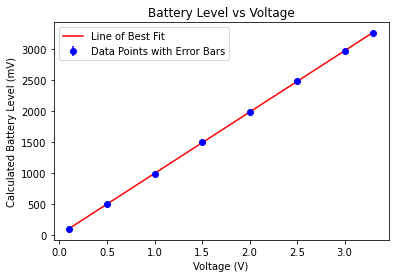

R-Squared Value: 0.9999557657937307


In [6]:
m, b, r, p_value, std_err = linregress(voltage, battery_avg)
y = m*voltage + b


plt.errorbar(voltage, battery_avg, yerr=battery_std, fmt='bo', label='Data Points with Error Bars')
plt.plot(voltage, y, 'r', label='Line of Best Fit')
plt.xlabel('Voltage (V)')
plt.ylabel('Calculated Battery Level (mV)')
plt.title('Battery Level vs Voltage')
plt.legend()
plt.show()

print("R-Squared Value:", r**2)

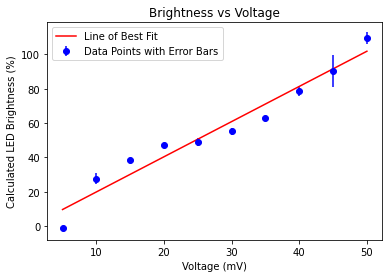

R-Squared Value: 0.9487765205459457


In [7]:
m, b, r, p_value, std_err = linregress(Vpp_100_in, Vpp_100_brightness_avg)
y = m*Vpp_100_in + b


plt.errorbar(Vpp_100_in, Vpp_100_brightness_avg, yerr=Vpp_100_brightness_std, fmt='bo', label='Data Points with Error Bars')
plt.plot(Vpp_100_in, y, 'r', label='Line of Best Fit')
plt.xlabel('Voltage (mV)')
plt.ylabel('Calculated LED Brightness (%)')
plt.title('Brightness vs Voltage')
plt.legend()
plt.show()

print("R-Squared Value:", r**2)

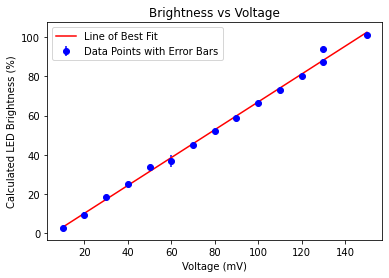

R-Squared Value: 0.9962817137938871


In [8]:
m, b, r, p_value, std_err = linregress(Vpp_500_in, Vpp_500_brightness_avg)
y = m*Vpp_500_in + b


plt.errorbar(Vpp_500_in, Vpp_500_brightness_avg, yerr=Vpp_500_brightness_std, fmt='bo', label='Data Points with Error Bars')
plt.plot(Vpp_500_in, y, 'r', label='Line of Best Fit')
plt.xlabel('Voltage (mV)')
plt.ylabel('Calculated LED Brightness (%)')
plt.title('Brightness vs Voltage')
plt.legend()
plt.show()

print("R-Squared Value:", r**2)

Both of these showed a fairly reliable linear fit, though at the lower voltages there is more room for error due to the resolution of the ADC read.

According to Nyquist's Sampling rate, we should always be sampling at at least 2 times the frequency of the data we're looking at. In this case, we are actually sampling at ten times the frequency of the signal, in order to be able to detect the maximum and minimum values of the sinusoid so that we can calculate Vpp. According to the datasheet, the maximum sampling rate of the device's ADC is 200 kHz, which means that if the measurements took no time to be made the maximum frequency we could use is 20 kHz. According to Logging statements taken at the begginging and end of the timer handler function, it takes ~1 ms to run through all of the data logging, with which work queues allows some leeway. The reality is that it does not take no time to record data, and any frequency greater than 500 hz introduced some issues.